RMSE: 336.5050670896428
R²: 0.2284985122510077


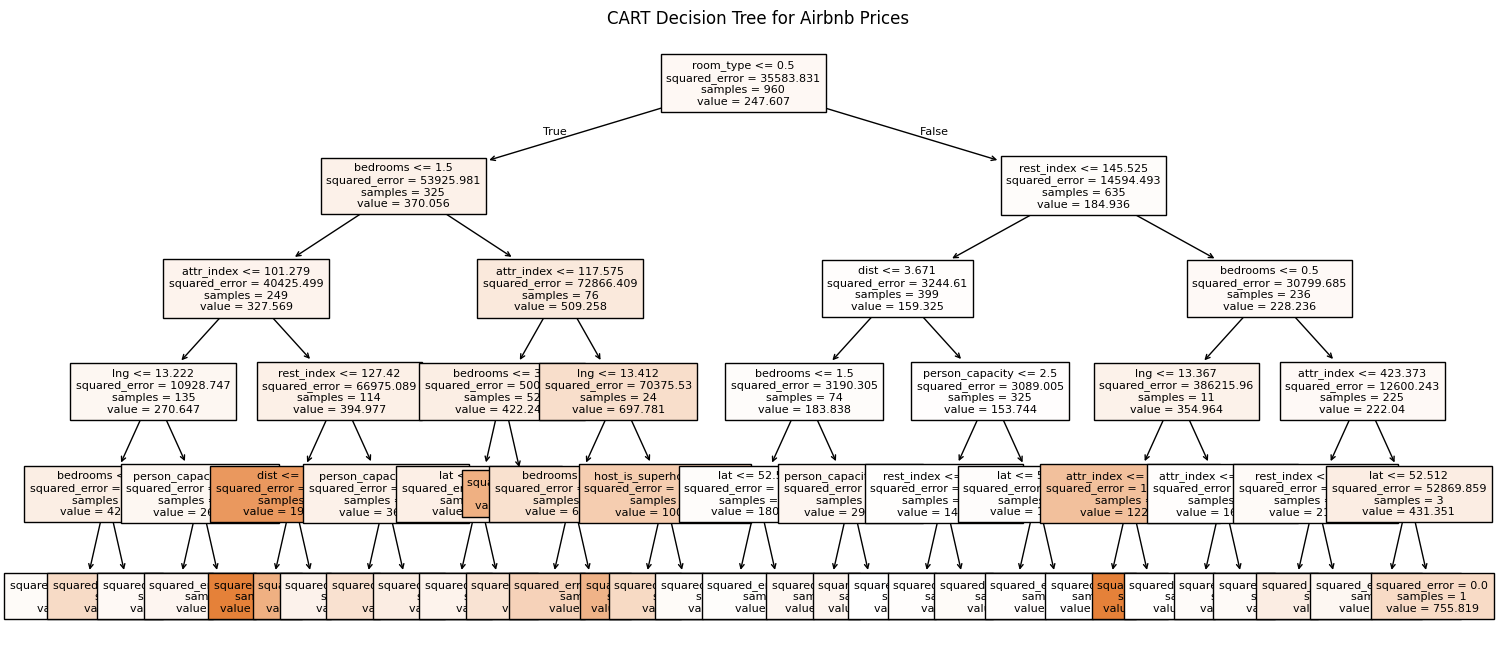

In [3]:
# === 1. Import thư viện ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# === 2. Đọc dữ liệu ===
url = "./data/berlin_weekends.csv"
df = pd.read_csv(url)

# === 3. Tiền xử lý dữ liệu ===
# Chọn các cột có giá trị hữu ích
cols = [
    "realSum", "room_type", "room_shared", "room_private", "person_capacity",
    "host_is_superhost", "multi", "biz", "cleanliness_rating",
    "guest_satisfaction_overall", "bedrooms", "dist", "attr_index",
    "rest_index", "lng", "lat"
]
df = df[cols]

# Chuyển các biến phân loại sang dạng số (Label Encoding)
le = LabelEncoder()
for col in ["room_type", "room_shared", "room_private", "host_is_superhost"]:
    df[col] = le.fit_transform(df[col].astype(str))

# === 4. Tách tập train/test ===
X = df.drop("realSum", axis=1)
y = df["realSum"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 5. Huấn luyện mô hình CART ===
model = DecisionTreeRegressor(
    criterion="squared_error",  # dùng residual reduction
    max_depth=5,                # giới hạn độ sâu để tránh overfitting
    random_state=42
)
model.fit(X_train, y_train)

# === 6. Đánh giá mô hình ===
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R²:", r2_score(y_test, y_pred))

# === 7. Trực quan hóa cây ===
plt.figure(figsize=(18,8))
plot_tree(model, feature_names=X.columns, filled=True, fontsize=8)
plt.title("CART Decision Tree for Airbnb Prices")
plt.show()


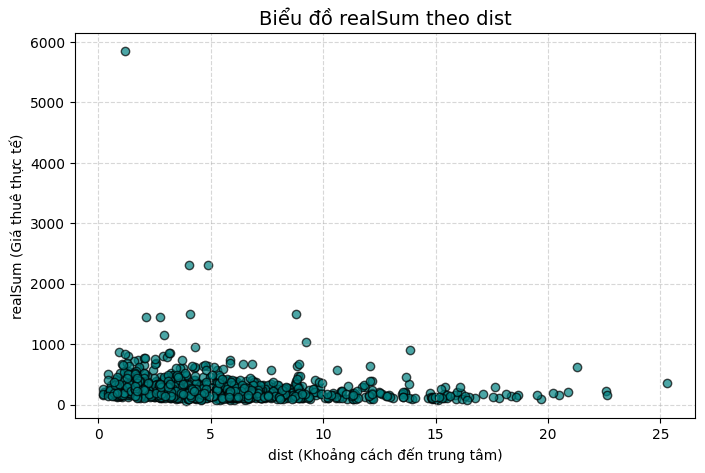

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Đọc dữ liệu ===
# Nếu bạn lưu dữ liệu trong file CSV, ví dụ: "data.csv"
df = pd.read_csv("./data/berlin_weekends.csv")

# Nếu bạn đang copy từ bảng (ví dụ Excel hoặc clipboard)
# df = pd.read_clipboard(sep="\t")

# === 2. Vẽ biểu đồ realSum theo dist ===
plt.figure(figsize=(8, 5))
plt.scatter(df["dist"], df["realSum"], alpha=0.7, color='teal', edgecolor='k')

plt.title("Biểu đồ realSum theo dist", fontsize=14)
plt.xlabel("dist (Khoảng cách đến trung tâm)")
plt.ylabel("realSum (Giá thuê thực tế)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

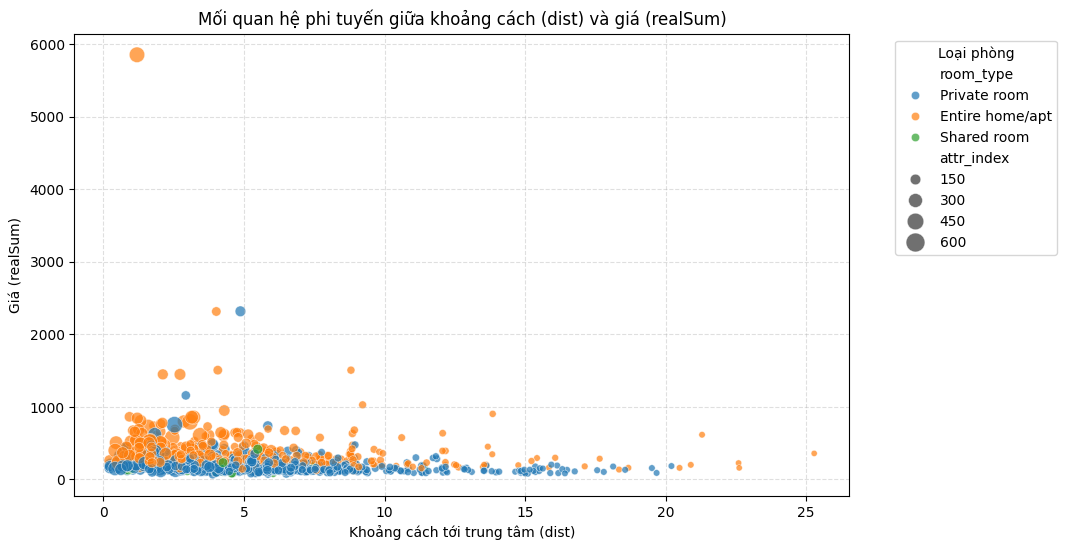

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV (hoặc bạn có thể copy đoạn bảng trên vào DataFrame)
df = pd.read_csv("./data/berlin_weekends.csv")

# Nếu bạn đã có sẵn DataFrame df, thì dùng luôn:
# Giả sử df có các cột như trong bảng trên

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ scatter, màu theo room_type
sns.scatterplot(
    data=df,
    x='dist',
    y='realSum',
    hue='room_type',
    size='attr_index',  # căn nào có attr_index cao sẽ được biểu thị to hơn
    sizes=(20, 200),
    alpha=0.7
)

plt.title("Mối quan hệ phi tuyến giữa khoảng cách (dist) và giá (realSum)")
plt.xlabel("Khoảng cách tới trung tâm (dist)")
plt.ylabel("Giá (realSum)")
plt.legend(title='Loại phòng', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()

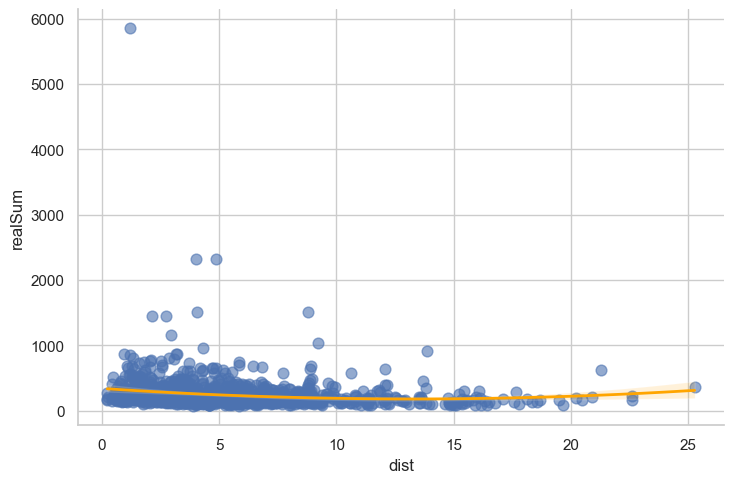

In [11]:
sns.lmplot(
    data=df,
    x='dist',
    y='realSum',
    order=2,   # đường cong bậc 2 (parabol)
    aspect=1.5,
    scatter_kws={'alpha': 0.6, 's': 60},
    line_kws={'color': 'orange', 'lw': 2}
)